# Here is my pyfesom2 notebook example

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import sys
import xarray as xr

sys.path.append('/home/ollie/loziel/pyfesom2/')
import pyfesom2 as pf

from netCDF4 import Dataset
import pandas as pd
import cmocean as cmo

# Loading mesh and mesh diagnostics

In [2]:
mesh = pf.load_mesh('/work/ollie/loziel/mesh/core2_meanz/', abg = [50, 16, -90], usepickle=True, usejoblib=False, protocol=4)
mesh

/work/ollie/loziel/mesh/core2_meanz/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/loziel/mesh/core2_meanz/pickle_mesh_py3_fesom2



FESOM mesh:
path                  = /work/ollie/loziel/mesh/core2_meanz
alpha, beta, gamma    = 50, 15, -90
number of 2d nodes    = 126858
number of 2d elements = 244659

        

In [3]:
#diag = pf.get_meshdiag(mesh,meshdiag='/work/ollie/loziel/model_output/A_riv_riverbranch/fesom.mesh.diag.nc')
diag = pf.get_meshdiag(mesh,meshdiag='/work/ollie/loziel/mesh/core2_meanz/fesom.mesh.diag.nc')

In [4]:
diag

<xarray.Dataset>
Dimensions:            (N: 9, edg_n: 371644, elem_n: 244659, n2: 2, n3: 3, n4: 4, nl: 48, nl1: 47, nod_n: 126858)
Dimensions without coordinates: N, edg_n, elem_n, n2, n3, n4, nl, nl1, nod_n
Data variables:
    zbar               (nl) float64 ...
    Z                  (nl1) float64 ...
    elem_area          (elem_n) float64 ...
    nlevels_nod2D      (nod_n) int32 ...
    nlevels            (elem_n) int32 ...
    nod_in_elem2D_num  (nod_n) int32 ...
    nod_part           (nod_n) int32 ...
    elem_part          (elem_n) int32 ...
    zbar_e_bottom      (elem_n) float64 ...
    zbar_n_bottom      (nod_n) float64 ...
    nod_area           (nl, nod_n) float64 ...
    elem               (n3, elem_n) int32 ...
    nodes              (n2, nod_n) float64 ...
    nod_in_elem2D      (N, nod_n) int32 ...
    edges              (n2, edg_n) int32 ...
    edge_tri           (n2, edg_n) int32 ...
    edge_cross_dxdy    (n4, edg_n) float64 ...
    gradient_sca_x     (n3, elem_n) float64 ...
    gradient_sca_y     (n3, elem_n) float64 ...

# Load model outputs

In [5]:
# Define paths
data_path_B = '/work/ollie/loziel/model_output/B_riv_riverbranch/'
data_path_A = '/work/ollie/loziel/model_output/A_riv_riverbranch/'
data_path_A_spinup = '/work/ollie/loziel/model_output/A_spinup_riv_riverbranch/'

## the 'new way'

In [6]:
data_A1 = pf.get_data(data_path_A, "temp", range(1968,1970), mesh)

Depth is None, 3d field will be returned


In [7]:
np.shape(data_A1)

(126858, 47)

In [8]:
data_A2 = pf.get_data(data_path_A, "temp", range(1968,1970), mesh, how="original") #None

Depth is None, 3d field will be returned


In [9]:
np.shape(data_A2)

(2, 126858, 47)

In [10]:
data_A3 = pf.get_data(data_path_A, "temp", range(1968,1970), mesh, how=None, compute = False)

Depth is None, 3d field will be returned


In [11]:
data_A3

<xarray.DataArray 'temp' (time: 2, nod2: 126858, nz1: 47)>
dask.array<concatenate, shape=(2, 126858, 47), dtype=float32, chunksize=(1, 126858, 47), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1968-12-31T23:15:00 1969-12-31T23:15:00
Dimensions without coordinates: nod2, nz1
Attributes:
    description:  temperature
    units:        C

In [12]:
data_A3_mean = data_A3.mean(dim='time').compute()
np.shape(data_A3_mean)

(126858, 47)

In [13]:
data_A3_yearly = data_A3.resample(time='YS').mean(dim='time')
np.shape(data_A3_yearly)

(2, 126858, 47)

## the 'old way'

In [14]:
var_id = "temp"
year=1970
ncfile	= data_path_A+var_id+'.fesom.'+str(year)+'.nc'
f	= Dataset(ncfile,'r')
data	= f.variables[var_id][:]

In [15]:
np.shape(data)

(1, 126858, 47)

# Plotting

## plotting with/without interpolation

CPU times: user 1.08 s, sys: 11 ms, total: 1.09 s
Wall time: 1.09 s


[<GeoAxesSubplot:>]

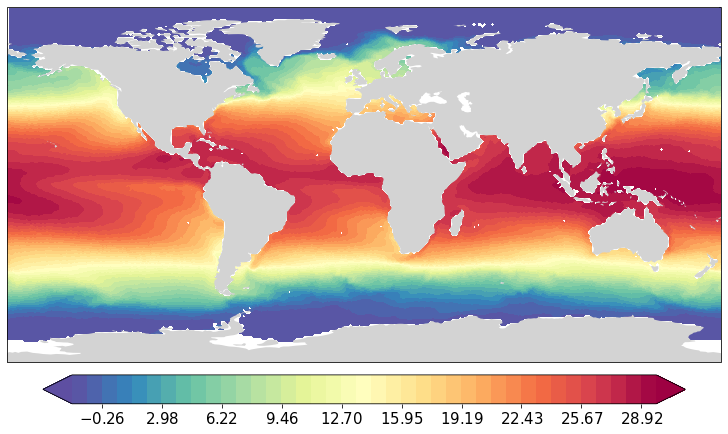

In [16]:
%%time
pf.plot(mesh, data_A1[:,0]) # interpolation

CPU times: user 893 ms, sys: 3.7 s, total: 4.6 s
Wall time: 927 ms


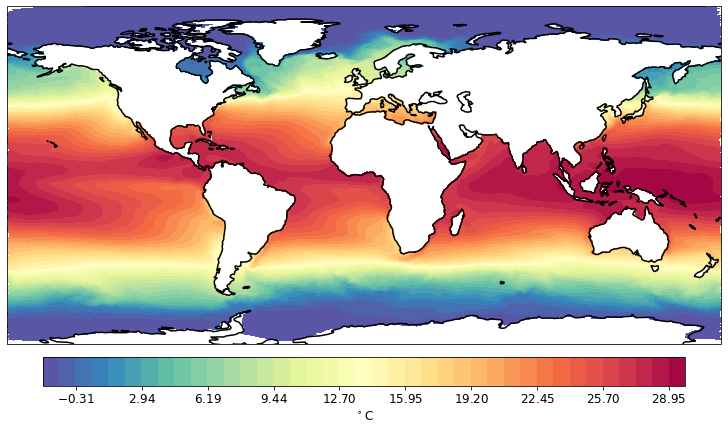

In [17]:
%%time
pf.tplot(mesh, data_A1[:,0]) # original grid

array([<GeoAxesSubplot:title={'center':'Temperature 0m'}>,
       <GeoAxesSubplot:title={'center':'Temperature 5m'}>,
       <GeoAxesSubplot:title={'center':'Temperature 10m'}>,
       <GeoAxesSubplot:title={'center':'Temperature 15m'}>], dtype=object)

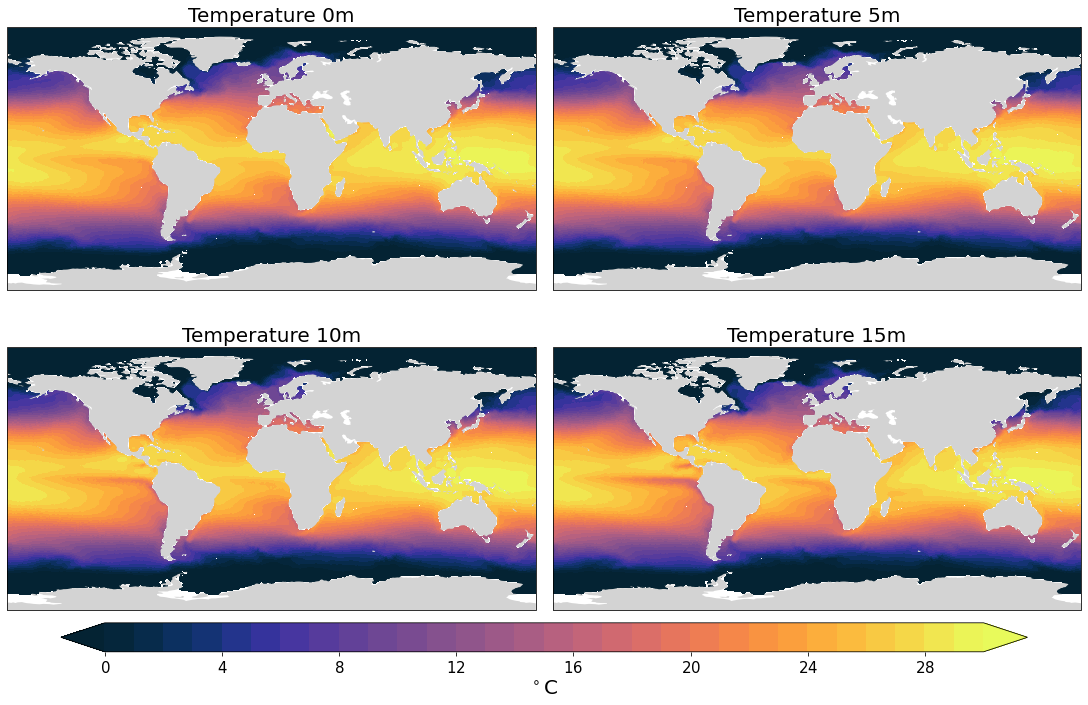

In [18]:
pf.plot(mesh, 
        [data_A1[:,0], data_A1[:,1], data_A1[:,2], data_A1[:,3]],
        levels=(0,30,31),
        units=r'$^\circ$C',
        titles=['Temperature 0m','Temperature 5m','Temperature 10m','Temperature 15m'],
        rowscol=[2,2],
        figsize=(15,10),
        cmap=cmo.cm.thermal,
       )

array([<GeoAxesSubplot:title={'center':'Temperature 0m'}>,
       <GeoAxesSubplot:title={'center':'Temperature 5m'}>,
       <GeoAxesSubplot:title={'center':'Temperature 10m'}>,
       <GeoAxesSubplot:title={'center':'Temperature 15m'}>], dtype=object)

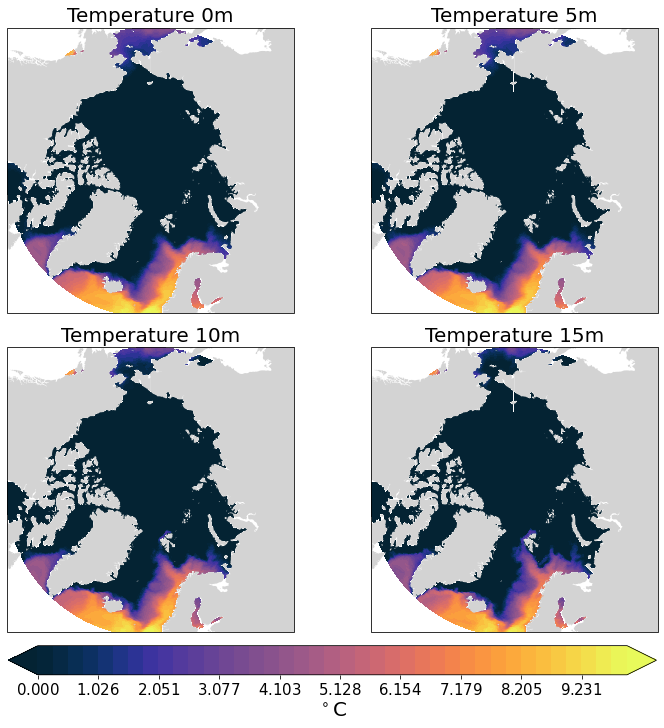

In [19]:
pf.plot(mesh, 
        [data_A1[:,0], data_A1[:,1], data_A1[:,2], data_A1[:,3]],
        levels=(0,10, 40),
        units=r'$^\circ$C',
        titles=['Temperature 0m','Temperature 5m','Temperature 10m','Temperature 15m'],
        rowscol=[2,2],
        figsize=(10,10),
        cmap=cmo.cm.thermal,
        mapproj='np',
        box=[-180, 180, 60, 90]
       )

[<GeoAxesSubplot:title={'center':'temperature difference 0m - 5m'}>]

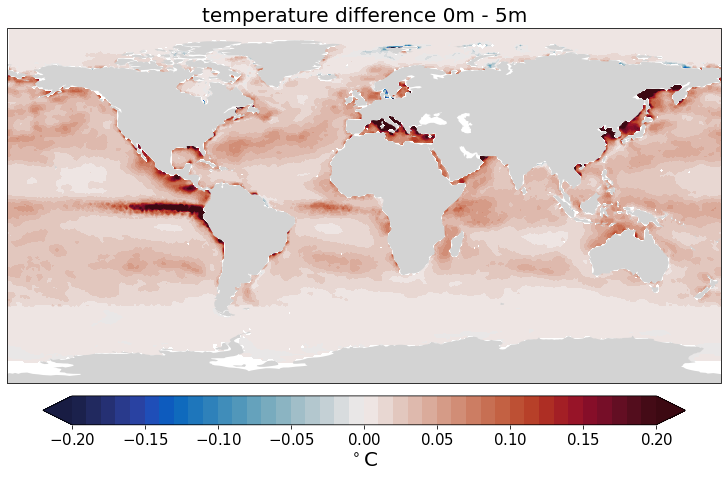

In [20]:
pf.plot(mesh, 
        data_A1[:,0]- data_A1[:,1],
        cmap=cmo.cm.balance,
        levels=(-.2,.2,41),
        units=r'$^\circ$C',
        titles='temperature difference 0m - 5m',
       )

## Other kinds of plots

## transects

In [21]:
lon_start = -20
lat_start = 80
lon_end = 20
lat_end = 80
npoints   = 50
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints)

<GeoAxesSubplot:>

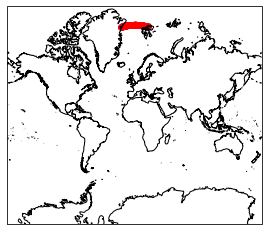

In [22]:
pf.plot_transect_map(lonlat, mesh, view='w')

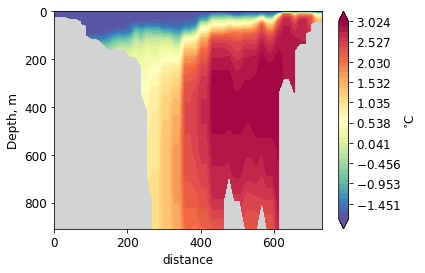

In [23]:
dist, transect_data = pf.get_transect(data_A1,
    mesh,
    lonlat)
pf.plot_xyz(mesh, transect_data, dist, xlabel='distance')

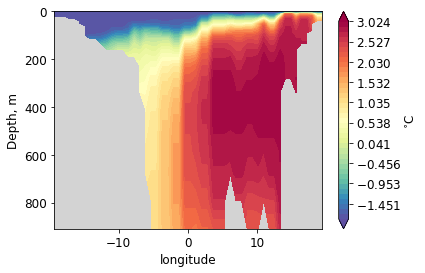

In [76]:
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints=npoints)
pf.plot_xyz(mesh, transect_data, lonlat[0,:], xlabel='longitude')

## Dealing with velocities
https://fesom2.readthedocs.io/en/latest/geometry.html

In [84]:
u = pf.get_data(data_path_A, 'u', [1965], mesh)
v = pf.get_data(data_path_A, 'v', [1965], mesh)

Depth is None, 3d field will be returned
Depth is None, 3d field will be returned


In [85]:
u_nodes = pf.tonodes3d(u, mesh)
v_nodes = pf.tonodes3d(v, mesh)

In [86]:
dist, rot_u, rot_v = pf.get_transect_uv(u_nodes, v_nodes, mesh, lonlat, myangle=0)

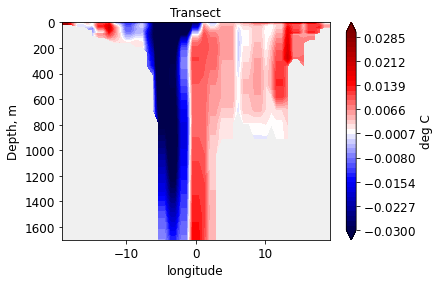

In [89]:
pf.plot_xyz(mesh, 
    rot_v,
    lonlat[0,:],
    maxdepth=2000,
    label="deg C",
    title="Transect",
    levels=np.round(np.linspace(-0.03, 0.03, 42),4),
    cmap=cm.seismic,
    ncols=2,
    figsize=(10,5),
    facecolor='#f0f0f0', xlabel='longitude'
)

## Hovmoller

In [41]:
data_A4 = pf.get_data(data_path_A, "temp", range(1968,1978), mesh, how="ori", compute=False)
vol = pf.hovm_data(data_A4, mesh)

Depth is None, 3d field will be returned


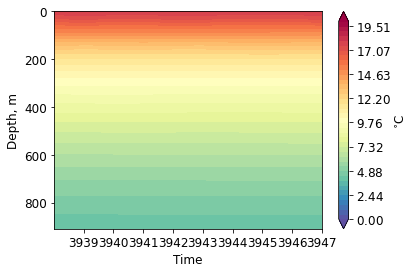

In [42]:
pf.plot_xyz(mesh, vol.T.data.T, vol.time.data, levels=np.linspace(0, 20, 42))

In [43]:
vol.time.data

array(['1968-12-31T23:15:00.000000000', '1969-12-31T23:15:00.000000000',
       '1970-12-31T23:15:00.000000000', '1971-12-31T23:15:00.000000000',
       '1972-12-31T23:15:00.000000000', '1973-12-31T23:15:00.000000000',
       '1974-12-31T23:15:00.000000000', '1975-12-31T23:15:00.000000000',
       '1976-12-31T23:15:00.000000000', '1977-12-31T23:15:00.000000000'],
      dtype='datetime64[ns]')

## profile

In [60]:
nod_area = np.ma.masked_equal(diag.nod_area.values, 0)

In [62]:
temp_by_area = ((np.ma.masked_equal(data_A1[:,:],0) * nod_area[:-1,:].T).mean(axis=0))

In [63]:
temp_weighted = temp_by_area/nod_area[:-1,:].T.mean(axis=0)

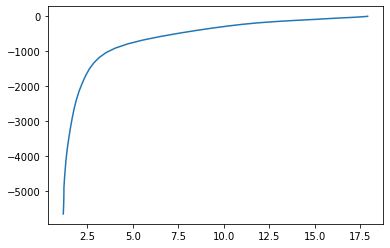

In [64]:
plt.plot(temp_weighted, mesh.zlev[:-1],)

## same but with mask

In [65]:
mask = pf.get_mask(mesh, "Arctic_Basin")

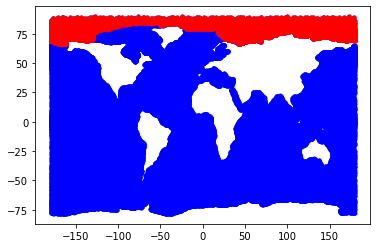

In [68]:
plt.plot(mesh.x2,mesh.y2,'.b')
plt.plot(mesh.x2[mask],mesh.y2[mask],'.r')

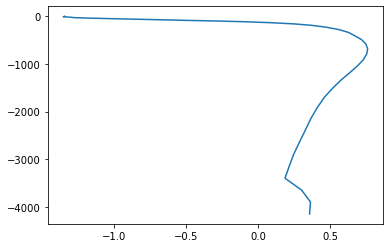

In [71]:
temp_by_area = ((np.ma.masked_equal(data_A1[mask,:],0) * nod_area[:-1,:].T[mask]).mean(axis=0))
temp_weighted = temp_by_area/nod_area[:-1,:].T[mask].mean(axis=0)
plt.plot(temp_weighted, mesh.zlev[:-1],)

## Volume weighted mean

In [55]:
temperature_0_500 = pf.volmean_data(data_A4, mesh, [500, 500])

Upper depth: -490.0, Lower depth: -490.0


In [58]:
temperature_0_500

<xarray.DataArray 'temp' (time: 10)>
dask.array<truediv, shape=(10,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1968-12-31T23:15:00 ... 1977-12-31T23:15:00

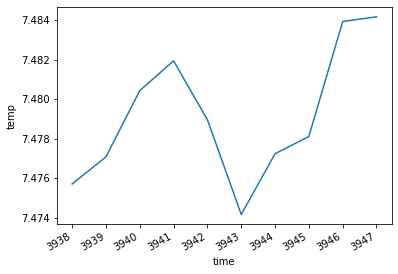

In [57]:
temperature_0_500.plot()

## Sea ice

In [80]:
a_ice = pf.get_data(data_path_A, "a_ice", range(1968,1978), mesh, how="ori", compute=False)

Depth is None, 3d field will be returned


In [81]:
ice_area = pf.ice_area(a_ice, mesh,)
ice_ext = pf.ice_ext(a_ice, mesh)

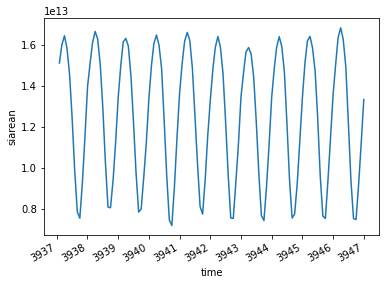

In [82]:
ice_area.plot()

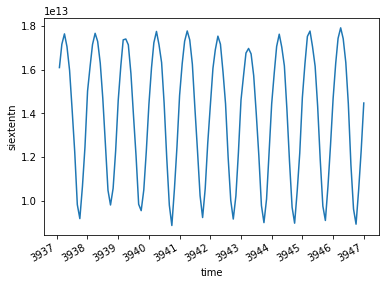

In [83]:
ice_ext.plot()

## Low level functions

In [ ]:
# select a region of interest
either use mask seen above or the cut_region function

In [ ]:
# manual interpolation
fesom2regular()

In [ ]:
# do matchups
tunnel_fast1d()

## some cool diagnostics

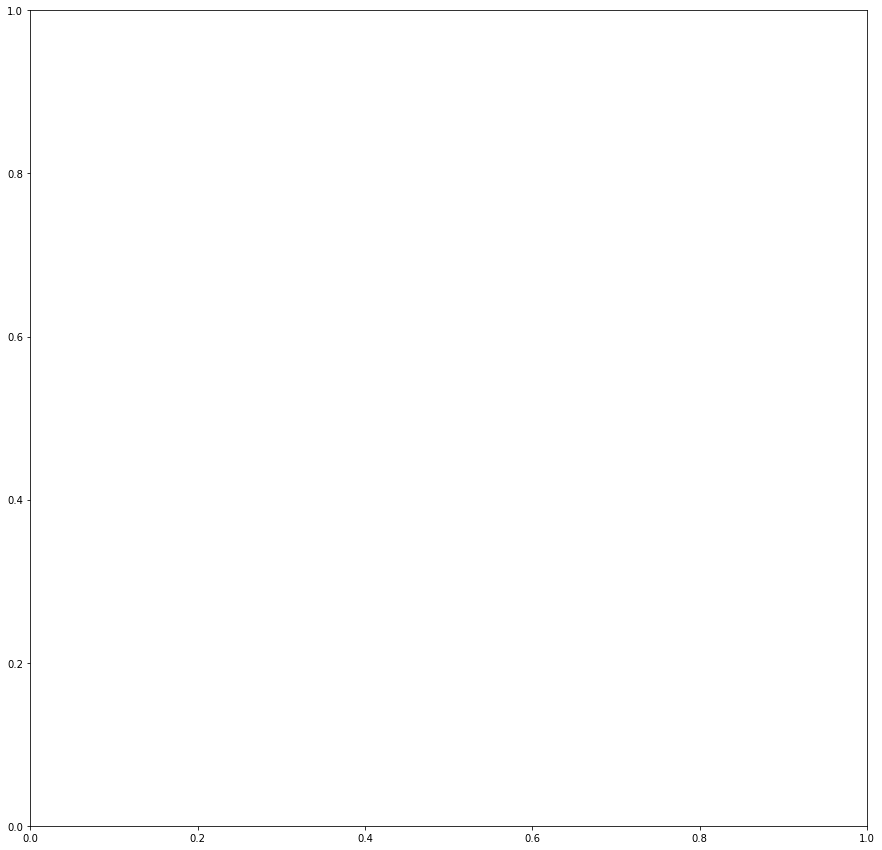

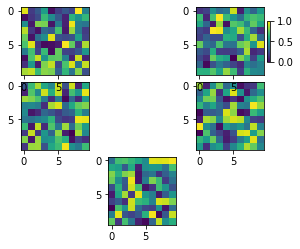

In [52]:
fig = plt.figure(figsize=(15,15), constrained_layout=False)
axd = plt.figure().subplot_mosaic(
    """
    AB
    CD
    EE
    """,
    gridspec_kw={'hspace': 0.1, 'wspace': 0.1}
)

f1 = axd['A'].imshow(np.random.random((10,10)), vmin=0, vmax=1)
f2 = axd['B'].imshow(np.random.random((10,10)), vmin=0, vmax=1)
f3 = axd['C'].imshow(np.random.random((10,10)), vmin=0, vmax=1)
f4 = axd['D'].imshow(np.random.random((10,10)), vmin=0, vmax=1)
f5 = axd['E'].imshow(np.random.random((10,10)), vmin=0, vmax=1)

cax = axd['B'].inset_axes([1.04, 0.2, 0.05, 0.6], transform=axd['B'].transAxes)
fig.colorbar(f2, cax=cax)
    
    
    
    
# fig.subplots_adjust(right=0.8)
# cbar2_ax = fig.add_axes([0.85, 0.05, 0.05, 0.25])

# cbar2 = fig.colorbar(f3,ax = cbar2_ax, 
#                         orientation = 'vertical',
#                         ticks = [-3,-2,-1,0,1,2,3]) 
# cbar2.ax.tick_params(labelsize=14)

In [53]:
np.arange(-3,3,0.125)

array([-3.   , -2.875, -2.75 , -2.625, -2.5  , -2.375, -2.25 , -2.125,
       -2.   , -1.875, -1.75 , -1.625, -1.5  , -1.375, -1.25 , -1.125,
       -1.   , -0.875, -0.75 , -0.625, -0.5  , -0.375, -0.25 , -0.125,
        0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
        1.   ,  1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ,  1.875,
        2.   ,  2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875])